# Analysis of Online News Popularity

**Created by Phillip Efthimion, Scott Payne, Gino Varghese and John Blevins**

*MSDS 7331 Data Mining - Section 403 - Lab 2*

## Data Preparation Part 1	
The online news popularity data set utilized in this analysis is publicly accessible from the UCI machine learning repository at https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity. The data was originally collected by Mashable based on articles published through their website between 2013 and 2015. The data set contains 39,644 data points with 61 attributes including 58 predictive attributes, 2 non-predictive attributes and 1 target attribute.  The data set is not a raw dataset and has already been cleaned prior to its upload on the UCI Machine Learning Repository. As a result there are no missing values that need to be reconciled.

In this lab, we will be be looking at the classifications of how popular and article is and whether it was published on a weekday or weekend. We will be analyzing our data using logistic regression, k nearest neighbors, random forest, and deep learning methods. We will be evaluating the output of these methods based on their accuracy, precision, recall, and F-measure. 

To examine the data in more detail and perform subsequent analysis operations the following modules are imported:

* Pandas
* Numpy
* Matplotlib
* Seaborn
* Warnings
* Datetime
* ipywidgets



In [109]:
# Import and Configure Required Modules
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
import datetime
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
warnings.simplefilter('ignore', DeprecationWarning)
plt.rcParams['figure.figsize']=(15,10)

# Read Online News Data
df = pd.read_csv('data/OnlineNewsPopularity.csv')

# Correct Column Names by Removing Leading Space
df.columns = df.columns.str.replace(' ', '')

# Rename Columns for Ease of Display
df = df.rename(columns={'weekday_is_monday': 'monday', 'weekday_is_tuesday': 'tuesday', 'weekday_is_wednesday': 'wednesday', 'weekday_is_thursday': 'thursday', 'weekday_is_friday': 'friday', 'weekday_is_saturday': 'saturday', 'weekday_is_sunday': 'sunday', 'is_weekend': 'weekend'})
df = df.rename(columns={'data_channel_is_lifestyle':'lifestyle', 'data_channel_is_entertainment':'entertainment', 'data_channel_is_bus':'business', 'data_channel_is_socmed':'social_media', 'data_channel_is_tech':'technology', 'data_channel_is_world':'world'})

# Encode a new "popular" column based on the # of shares 
# "popular" = 1 and "not popular" to 0.
df['popularity'] = pd.qcut(df['shares'].values, 2, labels=[0,1])
df.popularity = df.popularity.astype(np.int)
df.weekend = df.weekend.astype(np.int)


# Take a subset of the data related to Technology News Articles
dfsubset = df.loc[df['technology'] == 1]

# Reassign to New Variable and remove Columns which aren't needed
df_imputed = dfsubset
del df_imputed['url']
del df_imputed['shares']
del df_imputed['timedelta']
del df_imputed['lifestyle']
del df_imputed['entertainment']
del df_imputed['business']
del df_imputed['social_media']
del df_imputed['technology']
del df_imputed['world']

# Display Dataframe Structure
df_imputed.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7346 entries, 4 to 39639
Data columns (total 53 columns):
n_tokens_title                  7346 non-null float64
n_tokens_content                7346 non-null float64
n_unique_tokens                 7346 non-null float64
n_non_stop_words                7346 non-null float64
n_non_stop_unique_tokens        7346 non-null float64
num_hrefs                       7346 non-null float64
num_self_hrefs                  7346 non-null float64
num_imgs                        7346 non-null float64
num_videos                      7346 non-null float64
average_token_length            7346 non-null float64
num_keywords                    7346 non-null float64
kw_min_min                      7346 non-null float64
kw_max_min                      7346 non-null float64
kw_avg_min                      7346 non-null float64
kw_min_max                      7346 non-null float64
kw_max_max                      7346 non-null float64
kw_avg_max                  

## Data Preparation Part 2
We created the ‘popularity' class variable using our data from our ‘shares’ variable. We have decided to measure how popular an article from the Mashable dataset is based on the number of shares it receives. If an article has been shared more than a requisite number of times, then it is deemed popular. We created popularity with the ‘qcut’ tool in pandas and split the ‘shares' into two categories: ‘popular’ and ‘not popular’, which are coded by 1 and 0 respectively. ‘Popularity’ is coded as a non-null integers, though most of the other variables are floats. 

The weekend classification is a non-null float64 attribute. It was included as part of our dataset. It is a binary variable that tells if the article of this instance was published on the weekend or not. Articles not published on the weekend are published on weekdays. In this attribute, an instance is coded as 1 if it occurs on the weekend and an instance is coded as 0 if it occurs on a weekday. 

|Attribute|Data Type|Description|
|---------|---------|-----------|
| url | Object | URL of the article (non-predictive) |
| timedelta | Float | Days between the article publication and the dataset acquisition (non-predictive) |
| n_tokens_title | Float | Number of words in the title |
| n_tokens_content | Float | Number of words in the content |
| n_unique_tokens | Float | Rate of unique words in the content |
| n_non_stop_words | Float | Rate of non-stop words in the content |
| n_non_stop_unique_tokens | Float | Rate of unique non-stop words in the content |
| num_hrefs | Float | Number of links |
| num_self_hrefs | Float | Number of links to other articles published by Mashable |
| num_imgs | Float | Number of images |
| num_videos | Float | Number of videos |
| average_token_length | Float | Average length of the words in the content |
| num_keywords | Float | Number of keywords in the metadata |
| data_channel_is_lifestyle | Float | Is data channel 'Lifestyle'? |
| data_channel_is_entertainment | Float | Is data channel 'Entertainment'? |
| data_channel_is_bus | Float | Is data channel 'Business'? |
| data_channel_is_socmed | Float | Is data channel 'Social Media'? |
| data_channel_is_tech | Float | Is data channel 'Tech'? |
| data_channel_is_world | Float | Is data channel 'World'? |
| kw_min_min | Float | Worst keyword (min) |
| kw_max_min | Float | Worst keyword (max) |
| kw_avg_min | Float | Worst keyword (avg) |
| kw_min_max | Float | Best keyword (min) |
| kw_max_max | Float | Best keyword (max) |
| kw_avg_max | Float | Best keyword (avg) |
| kw_min_avg | Float | Avg keyword (min) |
| kw_max_avg | Float | Avg keyword (max) |
| kw_avg_avg | Float | Avg keyword (avg) |
| self_reference_min_shares | Float | Min  of referenced articles in Mashable |
| self_reference_max_shares | Float | Max  of referenced articles in Mashable |
| self_reference_avg_sharess | Float | Avg  of referenced articles in Mashable |
| weekday_is_monday | Float | Was the article published on a Monday? |
| weekday_is_tuesday | Float | Was the article published on a Tuesday? |
| weekday_is_wednesday | Float | Was the article published on a Wednesday? |
| weekday_is_thursday | Float | Was the article published on a Thursday? |
| weekday_is_friday | Float | Was the article published on a Friday? |
| weekday_is_saturday | Float | Was the article published on a Saturday? |
| weekday_is_sunday | Float | Was the article published on a Sunday? |
| is_weekend | Float | Was the article published on the weekend? |
| LDA_00 | Float | Closeness to LDA topic 0 |
| LDA_01 | Float | Closeness to LDA topic 1 |
| LDA_02 | Float | Closeness to LDA topic 2 |
| LDA_03 | Float | Closeness to LDA topic 3 |
| LDA_04 | Float | Closeness to LDA topic 4 |
| global_subjectivity | Float | Text subjectivity |
| global_sentiment_polarity | Float | Text sentiment polarity |
| global_rate_positive_words | Float | Rate of positive words in the content |
| global_rate_negative_words | Float | Rate of negative words in the content |
| rate_positive_words | Float | Rate of positive words among non-neutral tokens |
| rate_negative_words | Float | Rate of negative words among non-neutral tokens |
| avg_positive_polarity | Float | Avg polarity of positive words |
| min_positive_polarity | Float | Min polarity of positive words |
| max_positive_polarity | Float | Max polarity of positive words |
| avg_negative_polarity | Float | Avg polarity of positive words |
| min_negative_polarity | Float | Min polarity of positive words |
| max_negative_polarity | Float | Max polarity of positive words |
| title_subjectivity | Float | Title subjectivity |
| title_sentiment_polarity | Float | Title polarity |
| abs_title_subjectivity | Float | Absolute subjectivity level |
| abs_title_sentiment_polarity | Float | Absolute polarity level |
| Number of shares (target) | Integer | Number of Article Shares (tweets, shares, etc...)|

## Modeling and Evaluation 1
Accuracy is the proportion of the total number of predictions that were correct. From a confusion matrix, we can obtain the accuracy of the model by adding the number of instances that were predicted to be ‘Yes' and were actually ‘Yes' by the number of instances that were predicted to be ’No' and actually were ’No'. Then we take that sum and divide it by the total number of instances. Therefore the accuracy is measuring what percentage of the instances were identified ‘Yes’. 

Precision is the proportion of the positive cases that were identified ‘Yes'. From a confusion matrix, we can obtain the precision of the model by taking the number of instances that were predicted to be ‘Yes' and were actually ‘Yes' and divide this by the total number of instances that were predicted to be ‘Yes'. 

The Recall, also known as True Positive Rate, tells us that when an instance is actually ‘Yes', how often is it predicted to be ‘Yes’. So Recall is taking the number of instances that are predicted to be ‘Yes’ and are actually ‘Yes’ and dividing that by the total number of instances that are actually ‘Yes’. 

The F-measure is a weighted average of the precision and recall. The F measure is calculated by the product of the precision and recall divided by the sum of the precision and recall. The F measure is scored between 0 and 1 with 1 being the best value and 0 being the lowest. 

All of these measurements are appropriate for measuring our data. The accuracy lets us know a proportion of how well our model is performing to correctly predict the categories that our data belongs in. The precision and recall are both also appropriate measurements. To tell us what percentage of Mashable articles that we predict will be popular and are actually popular, precision is required. To tell us that when an article is actual popular, what percentage of time was this predicted? The F measure is a great tool for measuring the performance of models using the precision and recall, which we are already calculating both. Therefore, these are all appropriate models.

The following code initializes arrays to stop metric data in for the purposes of the analysis:

In [110]:
#import metrics to collect metrics for each modelS
from sklearn import metrics as mt

#Separating data sets for each task

#task 1 Popularity Classification
#df_task1 = df_imputed[['popularity','n_tokens_content', 'n_unique_tokens', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'kw_min_min', 'kw_max_avg', 'kw_avg_avg', 'weekend', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_negative_words']].copy()
df_task1=df_imputed

#task 2 isWeekend Classification
df_task2=df_imputed
df_task2 = df_task2.drop(['monday', 'tuesday','wednesday','thursday','friday','saturday','sunday'], axis=1)
 

#Task 1
#Create list to store datapoints for accuracy, precision, recall, F-measure from each of the model
accuracy_task1 = []
precision_task1 = []
recall_task1 = []
fmeasure_task1 = []

#Task 2
#Create list to store datapoints for accuracy, precision, recall, F-measure from each of the model
accuracy_task2 = []
precision_task2 = []
recall_task2 = []
fmeasure_task2 = []


## Modeling and Evaluation 2
For our approach we will be using a Stratified 10-Fold Cross Validation for our analysis.  This approach is used to obtain a sample population that best represents the entire population being analysed. Some of the advantages include but are not limited to, minimizing sample selection bias and ensuring certain segments of the population are not overrepresented or underrepresented.  The bottom line is Stratification is the process of rearranging the data as to ensure each fold is a good representative of the whole. In our process, the data will be rearranged 10 times and it is most appropriate for us to use in our analysis due to the characteristic of our data set.

As the data in our data set was collected to summarize a heterogeneous set of features about articles published by Mashable in a period of two years and because it includes such a diverse sample of individuals, it is very likely that the features that are highly correlated to our target classes. The locality of our testing data should not influence the classification of individual testing data. This is very important to the model we design. By performing a Stratified 10-Fold Cross Validation not only will provide us with a thorough method of splitting, training, and testing our models against our data set but also ensures our model to maintain a similar level of accuracy as it was developed.

By using 10 folds cross-validation, the dataset is split randomly into 10 equal parts. Of these 10 parts, 9 of them will be used for training. The final part will be used for testing the data after it is trained. This means that 90% of the data will be used for training and 10% will be used for testing. Since we are using cross-validation, this process will occur 10 times since for our k-folds cross validation k=10. This allows all observations to be used for both training and testing in separate instances. Since in this case we are stratifying, the folds will also take into account the proportions of our classification labels.


## Modeling and Evaluation 3
The following three classification models will be run for each classification task:
* Logistic Regression
* K-nearest Neighbor (KNN)
* Random Forest

The following parameters will be optimized during the analysis:
* C - Cost (Logistic Regression)
* n - Neighbors (KNN)
* k - Estimators (Random Forest)

For the Logistic Regression and Random Forest models these input parameters can be manipulated using an interactive slider tool.  

## Task 1 : Popularity (classification)
The first step is to setup the 10 fold stratified cross validation object.

In [111]:
#stratified 10 folds
from sklearn.model_selection import StratifiedKFold
df_task1_temp=df_task1

# we want to predict the X and y data as follows:
if 'popularity' in df_task1_temp:
    y_1 = df_task1_temp['popularity'].values # get the labels we want
    del df_task1_temp['popularity'] # get rid of the class label
    X_1 = df_task1_temp.values # use everything else to predict!
    
yhat_1 = np.zeros(y_1.shape)

cv_object = StratifiedKFold(n_splits=10, random_state=True, shuffle=True)
                         
print(cv_object)
cv_object.get_n_splits(X_1,y_1)

StratifiedKFold(n_splits=10, random_state=True, shuffle=True)


10

### Logistic Regression

For logistic regression, the following additional parameters are available for further configuration:
* penality: used to specify the norm used in the penalization, however by default it was set to 12. Therefore we removed it from our parameter
* dual: As number of samples are greater than number of features, this was set to false
* C : cost was toggled using a widget, as small cost implies stronger regulation             
* class_weight : was toggled between balanced and auto
* n_jobs: set to use the number of cores in the local machine

These were optimized to yeild the highest accuracy as shown below.

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from ipywidgets import widgets as wd

# get a handle to the classifier object, which defines the type
#penalty is set to default, which is 12.
def lr_explor(cost):
    lr_task1 = LogisticRegression(dual=False, C=cost, class_weight='balanced', n_jobs=-1)

    # iterate through and get predictions for each row in yhat
    for train, test in cv_object.split(X_1,y_1):
        lr_task1.fit(X_1[train],y_1[train])
        yhat_1[test] = lr_task1.predict(X_1[test])

    #evaluation metrics   
    acc = mt.accuracy_score(y_1, yhat_1)
    recall = mt.recall_score(y_1, yhat_1)
    precision = mt.precision_score(y_1, yhat_1)
    f = mt.f1_score(y_1, yhat_1)
 
    #results in percentage
    print("Accuracy of the model: {0:.4f}%".format(acc*100))
    print("Recall of the model: {0:.4f}%".format(recall*100))
    print("Precision of the model: {0:.4f}%".format(precision*100))
    print("F-measure of the model: {0:.4f}%".format(f*100))
wd.interact(lr_explor,cost=(0.001,5.0,0.05),__manual=True)




<function __main__.lr_explor>

For the purpose of this analysis the cost will be set to 4.0 for the Logistic Regression model.

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from ipywidgets import widgets as wd

# get a handle to the classifier object, which defines the type
#penalty is set to default, which is 12.

lr_task1 = LogisticRegression(dual=False, C=4.0, class_weight='balanced', n_jobs=-1)

# iterate through and get predictions for each row in yhat
for train, test in cv_object.split(X_1,y_1):
    lr_task1.fit(X_1[train],y_1[train])
    yhat_1[test] = lr_task1.predict(X_1[test])

#evaluation metrics   
acc = mt.accuracy_score(y_1, yhat_1)
recall = mt.recall_score(y_1, yhat_1)
precision = mt.precision_score(y_1, yhat_1)
f = mt.f1_score(y_1, yhat_1)

#adding evaluation metrics to list for further analysis between models
accuracy_task1.append(['logistic_accuracy',acc])
recall_task1.append(['logistic_recall',recall])
precision_task1.append(['logistic_precision',precision])
fmeasure_task1.append(['logistic_F-Measure',f])\
   
#results in percentage
print("Accuracy of the model: {0:.4f}%".format(acc*100))
print("Recall of the model: {0:.4f}%".format(recall*100))
print("Precision of the model: {0:.4f}%".format(precision*100))
print("F-measure of the model: {0:.4f}%".format(f*100))

Accuracy of the model: 60.5091%
Recall of the model: 57.4214%
Precision of the model: 70.5468%
F-measure of the model: 63.3110%


### K nearest Neighbors
For K Nearest Neighbors, the following additional parameters are available for further configuration:

* n_neighbors: code automatically identifies the best kvalue and this value is passed to n_neighbors        
* weights: function used in predition
* uniform was choosen, as we wanted all points in each neighborhood are weighted equally
* algorithm = was set to auto, the system was assigned to decide the most appropriate algorithm based on the values passed to fit method.
* n_jobs = set to use the number of cores in the local machine

These were optimized to yeild the highest accuracy as shown below.

In [114]:
# As a team we setup KNN Classifier iterator to to determine the accurate number of nearest neighbours
# the highest iterations we are planning was 30, to get the best accuracy
    # iterate through and get predictions for each row in yhat
lr_task1 = LogisticRegression(dual=False, C=1, class_weight='balanced', n_jobs=-1)
for train, test in cv_object.split(X_1,y_1):
    lr_task1.fit(X_1[train],y_1[train])
    yhat_1[test] = lr_task1.predict(X_1[test])

        
from sklearn.neighbors import KNeighborsClassifier
counter = 1;
best_accuracy= 0.0;
kVal = 1;
while counter <= 30:
    clf = KNeighborsClassifier(n_neighbors=counter, weights='uniform', metric='euclidean')
    clf.fit(X_1[train],y_1[train])
    acc = clf.score(X_1[test],y_1[test]);
    if acc > best_accuracy:
        best_accuracy = acc;
        kVal = counter;
    counter += 1;
neighbors=kVal
print("Best Accuracy returned by the classifier is: {0:.4f}%".format(best_accuracy*100),"with k value of:",kVal);

Best Accuracy returned by the classifier is: 58.2538% with k value of: 21


In [115]:
# Actual trainning and testing of the model begins
print("The best k value:", neighbors)
knn_task1 = KNeighborsClassifier(n_neighbors=neighbors, weights='uniform', algorithm='auto', n_jobs=-1)

# iterate through and get predictions for each row in yhat
for train, test in cv_object.split(X_1,y_1):
    knn_task1.fit(X_1[train],y_1[train])
    yhat_1[test] = knn_task1.predict(X_1[test])

#evaluation metrics   
acc = mt.accuracy_score(y_1, yhat_1)
recall = mt.recall_score(y_1, yhat_1)
precision = mt.precision_score(y_1, yhat_1)
f = mt.f1_score(y_1, yhat_1)

#adding evaluation metrics to list for further analysis between models
accuracy_task1.append(['KNN',acc])
recall_task1.append(['KNN',recall])
precision_task1.append(['KNN',precision])
fmeasure_task1.append(['KNN',f])



#results in percentage
print("Accuracy of the model: {0:.4f}%".format(acc*100))
print("Recall of the model: {0:.4f}%".format(recall*100))
print("Precision of the model: {0:.4f}%".format(precision*100))
print("F-measure of the model: {0:.4f}%".format(f*100))

The best k value: 21
Accuracy of the model: 58.0860%
Recall of the model: 75.6596%
Precision of the model: 62.0391%
F-measure of the model: 68.1757%


### Random Forest
For K Nearest Neighbors, the following additional parameters are available for further configuration:

* n_estimators = The number of trees in the forest
* criterion = was set to gini
* max_features = This option is set to auto, The number of features to consider when looking for the best split
* class_weight = 'balanced' Weights associated with classes
* n_jobs = set to use the number of cores in the local machine

These were optimized to yeild the highest accuracy as shown below.

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from ipywidgets import widgets as wd

def n_estimator(num):
    # get a handle to the classifier object, which defines the type
    rf_task1 = RandomForestClassifier(n_estimators=num, criterion='gini', max_features='auto', class_weight='balanced', n_jobs=-1)

    # iterate through and get predictions for each row in yhat
    for train, test in cv_object.split(X_1,y_1):
        rf_task1.fit(X_1[train],y_1[train])
        yhat_1[test] = rf_task1.predict(X_1[test])

    #evaluation metrics   
    acc = mt.accuracy_score(y_1, yhat_1)
    recall = mt.recall_score(y_1, yhat_1)
    precision = mt.precision_score(y_1, yhat_1)
    f = mt.f1_score(y_1, yhat_1)

    #results in percentage
    print("Accuracy of the model: {0:.4f}%".format(acc*100))
    print("Recall of the model: {0:.4f}%".format(recall*100))
    print("Precision of the model: {0:.4f}%".format(precision*100))
    print("F-measure of the model: {0:.4f}%".format(f*100))
wd.interact(n_estimator,num=(100,150,10),__manual=True) 

<function __main__.n_estimator>

For the purpose of this analysis the n_estimators will be set to 120 for the Random Forest model.

In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from ipywidgets import widgets as wd

# get a handle to the classifier object, which defines the type
rf_task1 = RandomForestClassifier(n_estimators=120, criterion='gini', max_features='auto', class_weight='balanced', n_jobs=-1)

# iterate through and get predictions for each row in yhat
for train, test in cv_object.split(X_1,y_1):
    rf_task1.fit(X_1[train],y_1[train])
    yhat_1[test] = rf_task1.predict(X_1[test])

#evaluation metrics   
acc = mt.accuracy_score(y_1, yhat_1)
recall = mt.recall_score(y_1, yhat_1)
precision = mt.precision_score(y_1, yhat_1)
f = mt.f1_score(y_1, yhat_1)

#adding evaluation metrics to list for further analysis between models
accuracy_task1.append(['RandomForest',acc])
recall_task1.append(['RandomForest',recall])
precision_task1.append(['RandomForest',precision])
fmeasure_task1.append(['RandomForest',f])

#results in percentage
print("Accuracy of the model: {0:.4f}%".format(acc*100))
print("Recall of the model: {0:.4f}%".format(recall*100))
print("Precision of the model: {0:.4f}%".format(precision*100))
print("F-measure of the model: {0:.4f}%".format(f*100))


Accuracy of the model: 65.1783%
Recall of the model: 83.0007%
Precision of the model: 66.5685%
F-measure of the model: 73.8820%


## Task 2 : Weekend (classification)
A different 10 fold stratified cross validation object is created for Task 2.

In [118]:
cv_object_2=None
df_task2_temp=df_task2
# we want to predict the X and y data as follows:
if 'weekend' in df_task2_temp:
    y_2 = df_task2_temp['weekend'].values # get the labels we want
    del df_task2_temp['weekend'] # get rid of the class label
    X_2 = df_task2_temp.values # use everything else to predict!
    
yhat_2 = np.zeros(y_2.shape)

cv_object_2 = StratifiedKFold(n_splits=10, random_state=True, shuffle=True)
                         
print(cv_object_2)
cv_object_2.get_n_splits(X_2,y_2)

StratifiedKFold(n_splits=10, random_state=True, shuffle=True)


10

### Logistic Regression

For logistic regression, the following additional parameters are available for further configuration:
* penality: used to specify the norm used in the penalization, however by default it was set to 12. Therefore we removed it from our parameter
* dual: As number of samples are greater than number of features, this was set to false
* C : cost was toggled using a widget, as small cost implies stronger regulation             
* class_weight : was toggled between balanced and auto
* n_jobs: set to use the number of cores in the local machine

These were optimized to yeild the highest accuracy as shown below.

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from ipywidgets import widgets as wd

def lr_explor(cost_2):
# get a handle to the classifier object, which defines the type
#penalty is set to default, which is 12.
    lr_task2 = LogisticRegression(dual=False, C=cost_2, class_weight='balanced',n_jobs=-1)

    # iterate through and get predictions for each row in yhat
    for train, test in cv_object_2.split(X_2,y_2):
        lr_task2.fit(X_2[train],y_2[train])
        yhat_2[test] = lr_task2.predict(X_2[test])

    #evaluation metrics   
    acc = mt.accuracy_score(y_2, yhat_2)
    recall = mt.recall_score(y_2, yhat_2)
    precision = mt.precision_score(y_2, yhat_2)
    f = mt.f1_score(y_2, yhat_2)

    #results in percentage
    print("Accuracy of the model: {0:.4f}%".format(acc*100))
    print("Recall of the model: {0:.4f}%".format(recall*100))
    print("Precision of the model: {0:.4f}%".format(precision*100))
    print("F-measure of the model: {0:.4f}%".format(f*100))
    
wd.interact(lr_explor,cost_2=(0.001,5.0,0.05),__manual=True)

<function __main__.lr_explor>

For the purpose of this analysis the cost will be set to 4.0 for the Logistic Regression model.

In [120]:
# get a handle to the classifier object, which defines the type
#penalty is set to default, which is 12.
lr_task2 = LogisticRegression(dual=False, C=4.0, class_weight='balanced',n_jobs=-1)

# iterate through and get predictions for each row in yhat
for train, test in cv_object_2.split(X_2,y_2):
    lr_task2.fit(X_2[train],y_2[train])
    yhat_2[test] = lr_task2.predict(X_2[test])

#evaluation metrics   
acc = mt.accuracy_score(y_2, yhat_2)
recall = mt.recall_score(y_2, yhat_2)
precision = mt.precision_score(y_2, yhat_2)
f = mt.f1_score(y_2, yhat_2)
    
#adding evaluation metrics to list for further analysis between models
accuracy_task2.append(['logistic_accuracy',acc])
recall_task2.append(['logistic_recall',recall])
precision_task2.append(['logistic_precision',precision])
fmeasure_task2.append(['logistic_F-Measure',f])

#results in percentage
print("Accuracy of the model: {0:.4f}%".format(acc*100))
print("Recall of the model: {0:.4f}%".format(recall*100))
print("Precision of the model: {0:.4f}%".format(precision*100))
print("F-measure of the model: {0:.4f}%".format(f*100))

Accuracy of the model: 62.7280%
Recall of the model: 67.2096%
Precision of the model: 20.2619%
F-measure of the model: 31.1368%


### K nearest Neighbors
For K Nearest Neighbors, the following additional parameters are available for further configuration:

* n_neighbors: code automatically identifies the best kvalue and this value is passed to n_neighbors        
* weights: function used in predition
* uniform was choosen, as we wanted all points in each neighborhood are weighted equally
* algorithm = was set to auto, the system was assigned to decide the most appropriate algorithm based on the values passed to fit method.
* n_jobs = set to use the number of cores in the local machine

These were optimized to yeild the highest accuracy as shown below.

In [121]:
# As a team we setup KNN Classifier iterator to to determine the accurate number of nearest neighbours
# the highest iterations we are planning was 30, to get the best accuracy
lr_task2 = LogisticRegression(dual=False, C=1, class_weight='balanced',n_jobs=-1)
for train, test in cv_object_2.split(X_2,y_2):
    lr_task2.fit(X_2[train],y_2[train])
    yhat_2[test] = lr_task2.predict(X_2[test])
    
from sklearn.neighbors import KNeighborsClassifier
counter = 1;
best_accuracy= 0.0;
kVal = 1;
while counter <= 30:
    clf = KNeighborsClassifier(n_neighbors=counter, weights='uniform', metric='euclidean')
    clf.fit(X_2[train],y_2[train])
    acc = clf.score(X_2[test],y_2[test]);
    if acc > best_accuracy:
        best_accuracy = acc;
        kVal = counter;
    counter += 1;
neighbors=kVal
print("Best Accuracy returned by the classifier is: {0:.4f}%".format(best_accuracy*100),"with k value of:",kVal);

Best Accuracy returned by the classifier is: 87.7384% with k value of: 4


In [122]:
# Actual trainning and testing of the model begins
print("The best k value:", neighbors)
knn_task2 = KNeighborsClassifier(n_neighbors=neighbors, weights='uniform', algorithm='auto', n_jobs=-1)

# iterate through and get predictions for each row in yhat
for train, test in cv_object_2.split(X_2,y_2):
    knn_task2.fit(X_2[train],y_2[train])
    yhat_2[test] = knn_task2.predict(X_2[test])

#evaluation metrics   
acc = mt.accuracy_score(y_2, yhat_2)
recall = mt.recall_score(y_2, yhat_2)
precision = mt.precision_score(y_2, yhat_2)
f = mt.f1_score(y_2, yhat_2)

#adding evaluation metrics to list for further analysis between models
accuracy_task2.append(['KNN',acc])
recall_task2.append(['KNN',recall])
precision_task2.append(['KNN',precision])
fmeasure_task2.append(['KNN',f])


#results in percentage
print("Accuracy of the model: {0:.4f}%".format(acc*100))
print("Recall of the model: {0:.4f}%".format(recall*100))
print("Precision of the model: {0:.4f}%".format(precision*100))
print("F-measure of the model: {0:.4f}%".format(f*100))

The best k value: 4
Accuracy of the model: 87.2584%
Recall of the model: 4.8860%
Precision of the model: 42.8571%
F-measure of the model: 8.7719%


### Random Forest
For K Nearest Neighbors, the following additional parameters are available for further configuration:

* n_estimators = The number of trees in the forest
* criterion = was set to gini
* max_features = This option is set to auto, The number of features to consider when looking for the best split
* class_weight = 'balanced' Weights associated with classes
* n_jobs = set to use the number of cores in the local machine

These were optimized to yeild the highest accuracy as shown below.

In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from ipywidgets import widgets as wd

def n_estimator(num):
    # get a handle to the classifier object, which defines the type
    rf_task2 = RandomForestClassifier(n_estimators=num, criterion='gini', max_features='auto', class_weight='balanced', n_jobs=-1)

    # iterate through and get predictions for each row in yhat
    for train, test in cv_object_2.split(X_2,y_2):
        rf_task2.fit(X_2[train],y_2[train])
        yhat_2[test] = rf_task2.predict(X_2[test])

    #evaluation metrics   
    acc = mt.accuracy_score(y_2, yhat_2)
    recall = mt.recall_score(y_2, yhat_2)
    precision = mt.precision_score(y_2, yhat_2)
    f = mt.f1_score(y_2, yhat_2)
    
    #results in percentage
    print("Accuracy of the model: {0:.4f}%".format(acc*100))
    print("Recall of the model: {0:.4f}%".format(recall*100))
    print("Precision of the model: {0:.4f}%".format(precision*100))
    print("F-measure of the model: {0:.4f}%".format(f*100))
wd.interact(n_estimator,num=(100,150,10),__manual=True) 


<function __main__.n_estimator>

For the purpose of this analysis the n_estimators will be set to 120 for the Random Forest model.

In [124]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from ipywidgets import widgets as wd

# get a handle to the classifier object, which defines the type
rf_task2 = RandomForestClassifier(n_estimators=120, criterion='gini', max_features='auto', class_weight='balanced', n_jobs=-1)

# iterate through and get predictions for each row in yhat
for train, test in cv_object_2.split(X_2,y_2):
    rf_task2.fit(X_2[train],y_2[train])
    yhat_2[test] = rf_task2.predict(X_2[test])

#evaluation metrics   
acc = mt.accuracy_score(y_2, yhat_2)
recall = mt.recall_score(y_2, yhat_2)
precision = mt.precision_score(y_2, yhat_2)
f = mt.f1_score(y_2, yhat_2)
    
#results in percentage
print("Accuracy of the model: {0:.4f}%".format(acc*100))
print("Recall of the model: {0:.4f}%".format(recall*100))
print("Precision of the model: {0:.4f}%".format(precision*100))
print("F-measure of the model: {0:.4f}%".format(f*100))


#adding evaluation metrics to list for further analysis between models
accuracy_task2.append(['RandomForest',acc])
recall_task2.append(['RandomForest',recall])
precision_task2.append(['RandomForest',precision])
fmeasure_task2.append(['RandomForest',f])

Accuracy of the model: 88.7830%
Recall of the model: 10.9663%
Precision of the model: 96.1905%
F-measure of the model: 19.6881%


## Modeling and Evaluation 4
<b>Analyze the results using your chosen method of evaluation. Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why they are interesting to someone that might use this model.</b>

In this section the results of the fitted models for each task will be examined.  The resultant accuracy, recall, precision and f-measure metrics for classification task one (popularity) can be seen in the table below.

In [125]:
from tabulate import tabulate
print("Classification Task 1 (Popularity) Metrics")
print("\nAccuracy")
print(tabulate(accuracy_task1))
print("\nRecall")
print(tabulate(recall_task1))              
print("\nPrecision")
print(tabulate(precision_task1))              
print("\nF-Measure")
print(tabulate(fmeasure_task1))

Classification Task 1 (Popularity) Metrics

Accuracy
-----------------  --------
logistic_accuracy  0.605091
KNN                0.58086
RandomForest       0.651783
-----------------  --------

Recall
---------------  --------
logistic_recall  0.574214
KNN              0.756596
RandomForest     0.830007
---------------  --------

Precision
------------------  --------
logistic_precision  0.705468
KNN                 0.620391
RandomForest        0.665685
------------------  --------

F-Measure
------------------  --------
logistic_F-Measure  0.63311
KNN                 0.681757
RandomForest        0.73882
------------------  --------


The stacked bar plot below shows these metrics represented graphically.

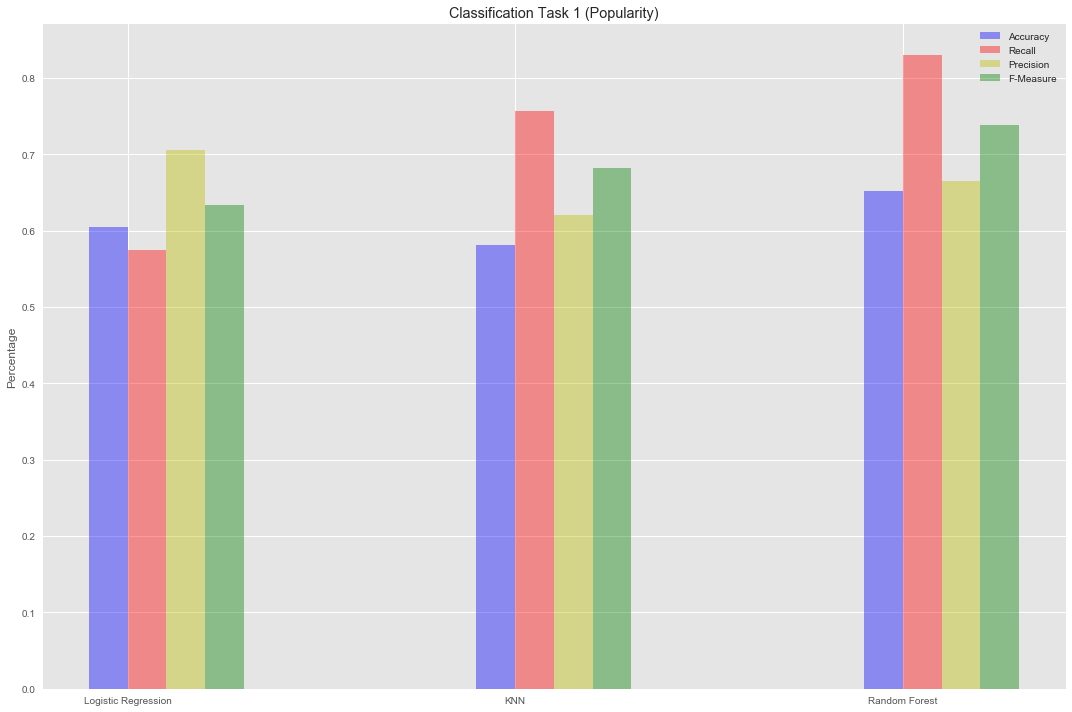

In [126]:
n_groups = 3

accuracy_task1_plt = (accuracy_task1[0][1], accuracy_task1[1][1], accuracy_task1[2][1])
recall_task1_plt = (recall_task1[0][1], recall_task1[1][1], recall_task1[2][1])
precision_task1_plt = (precision_task1[0][1], precision_task1[1][1], precision_task1[2][1])
fmeasure_task1_plt = (fmeasure_task1[0][1], fmeasure_task1[1][1], fmeasure_task1[2][1])
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.4
rects1 = plt.bar(index, accuracy_task1_plt, bar_width, alpha=opacity, color='b', label='Accuracy')
rects2 = plt.bar(index + bar_width, recall_task1_plt, bar_width, alpha=opacity, color='r', label='Recall')
rects3 = plt.bar(index + bar_width + bar_width, precision_task1_plt, bar_width, alpha=opacity, color='y', label='Precision')
rects4 = plt.bar(index + bar_width + bar_width + bar_width, fmeasure_task1_plt, bar_width, alpha=opacity, color='g', label='F-Measure')

plt.ylabel('Percentage')
plt.title('Classification Task 1 (Popularity)')
plt.xticks(index + bar_width / 2, ('Logistic Regression', 'KNN', 'Random Forest'))
plt.legend()

plt.tight_layout()
plt.show()

These diagrams show that for the popularity classification task the accuracy of each of the three models is about the same.  The recall is substantially higher for the KNN and Random forest models which suggest they would produce fewer false negatives.  The Logistic Regression model has a higher precision metric which suggests it would produce fewer false positives.  The collective F-Measure metric is also higher for KNN and Random Forest models than for the Logistic Regression model.  Overall the Random Forest model appears to provide the best overall metrics for the analysis of this scenario.

The resultant accuracy, recall, precision and f-measure metrics for classification task two (weekend) can be seen in the table below.


In [127]:
print("Classification Task 2 (Weekend) Metrics")
print("\nAccuracy")
print(tabulate(accuracy_task2))
print("\nRecall")
print(tabulate(recall_task2))              
print("\nPrecision")
print(tabulate(precision_task2))              
print("\nF-Measure")
print(tabulate(fmeasure_task2))

Classification Task 2 (Weekend) Metrics

Accuracy
-----------------  --------
logistic_accuracy  0.62728
KNN                0.872584
RandomForest       0.88783
-----------------  --------

Recall
---------------  ---------
logistic_recall  0.672096
KNN              0.0488599
RandomForest     0.109663
---------------  ---------

Precision
------------------  --------
logistic_precision  0.202619
KNN                 0.428571
RandomForest        0.961905
------------------  --------

F-Measure
------------------  ---------
logistic_F-Measure  0.311368
KNN                 0.0877193
RandomForest        0.196881
------------------  ---------


The stacked bar plot below shows these metrics represented graphically.

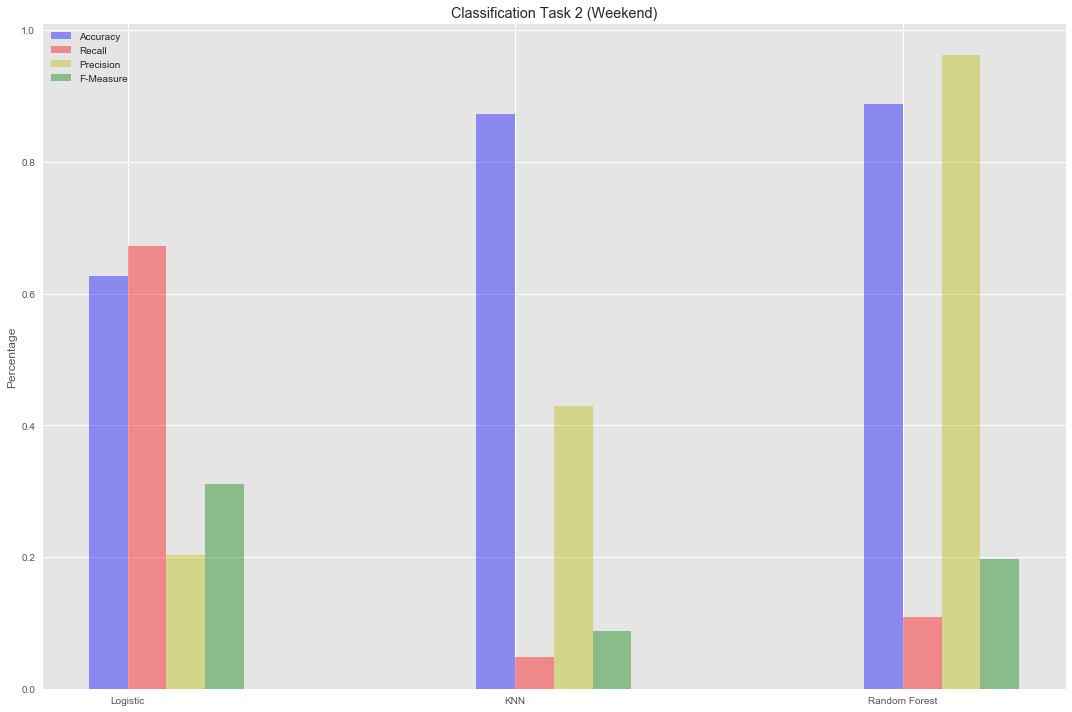

In [128]:
n_groups = 3
accuracy_task2_plt = (accuracy_task2[0][1], accuracy_task2[1][1], accuracy_task2[2][1])
recall_task2_plt = (recall_task2[0][1], recall_task2[1][1], recall_task2[2][1])
precision_task2_plt = (precision_task2[0][1], precision_task2[1][1], precision_task2[2][1])
fmeasure_task2_plt = (fmeasure_task2[0][1], fmeasure_task2[1][1], fmeasure_task2[2][1])
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.4
error_config = {'ecolor': '0.3'}
rects1 = plt.bar(index, accuracy_task2_plt, bar_width, alpha=opacity, color='b', label='Accuracy')
rects2 = plt.bar(index + bar_width, recall_task2_plt, bar_width, alpha=opacity, color='r', label='Recall')
rects3 = plt.bar(index + bar_width + bar_width, precision_task2_plt, bar_width, alpha=opacity, color='y', label='Precision')
rects4 = plt.bar(index + bar_width + bar_width + bar_width, fmeasure_task2_plt, bar_width, alpha=opacity, color='g', label='F-Measure')
plt.ylabel('Percentage')
plt.title('Classification Task 2 (Weekend)')
plt.xticks(index + bar_width / 2, ('Logistic', 'KNN', 'Random Forest'))
plt.legend()
plt.tight_layout()
plt.show()

These diagrams show that for the weekend classification task the accuracy and precision of the KNN and Random Forest models is statistically larger than the Logistic Regression model.  It is also interesting to note the the Recall is much larger with the Logistic Regression model than with the KNN or Random Forest models.  This strongly suggests that the Logistic model would produce far fewer false negatives.  The collective F-Measure metric is also reasonably higher for the Logistic model than for the other two.  The fact the the latter two models have low effective F-Measures should give pause to the interpretation of the accuracy.  This may be a case where the model is biased or not fitted properly and could be distorting overall accuracy in this scenario.  

## Modeling and Evaluation 5
In this section the models used in the analysis of tasks one and two will be compared. While accuracy will be one of the primary focuses, metrics related to the cost of estimating incorectly will also be considered. These include recall, precision and F-Measure. If these metrics are ignored there is an increased risk of failing to detect alternate class examples which may cause any perceived accuracy to be misleading. Higher prceision ensures lower flase positives are detected and higher recall ensure lower false negatives are detected. The two can be combined into the effective F-measure score where higher scores have lower false negatives and false positives. Sample size can also have an effect on the suitability of the model. Smaller sample sizes can easily result in a model with high bias with low variance due to the lack of equally distributed and representative samples. Large sample sizes provide a better scenario to ensure bias is minimized. The dataset in this analysis with over 30000 records is sufficient. The models were fitted taking into account the high variance present in order to not overfit the model. 

For classification task 1 we can see from the above charts that the KNN and Random Forest models would be better for data with smaller false positive rates while the Logistic regression model would be better for larger FPR.  Also the accuracies for the models appears to be sufficient close for further examination of confidence intervals to determine if models are equivalent.  For classification task 2 the opposite is true.  The logistic regression model would be better for data with smaller FPR while the KNN and Random Forest models would be better for data with larger FPR.  The metrics for this model don't appear to be sufficiently close to compare the confidence intervals between the resultant error rates.

The code below shows the error rates which would need to be compared for task 1.  The confidence interval can be calculated using the variance and difference in error rates for each fold.

In [129]:
scores_lr = cross_val_score(lr_task1, X_1, y_1, cv=10)
error_lr = 1 - scores_lr
print('Fold Error Rates for Logistic Regression:', error_lr)
scores_knn = cross_val_score(knn_task1, X_1, y_1, cv=10)
error_knn = 1 - scores_knn
print('Fold Error Rates for Logistic Regression:', error_knn)
scores_rf = cross_val_score(rf_task1, X_1, y_1, cv=10)
error_rf = 1 - scores_rf
print('Fold Error Rates for Logistic Regression:', error_rf)


Fold Error Rates for Logistic Regression: [ 0.39319728  0.56190476  0.43129252  0.37823129  0.39591837  0.42857143
  0.42040816  0.40190736  0.38419619  0.43110505]
Fold Error Rates for Logistic Regression: [ 0.40680272  0.64489796  0.57142857  0.44489796  0.44489796  0.42585034
  0.40680272  0.42915531  0.41961853  0.44747613]
Fold Error Rates for Logistic Regression: [ 0.40816327  0.38095238  0.37687075  0.33877551  0.34557823  0.38367347
  0.37142857  0.3760218   0.36103542  0.38472033]


## Modeling and Evaluation 6
<b> Which attributes from your analysis are most important? Use proper methods discussed in class to evaluate the importance of different attributes. Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task. </b>

Feature importance for Logistic Regression can be done by analyzing the weight of attributes calculated through the cross_val_score() function as below.  For classification task 1 we can see that the top heavily weighted attributes are: average_token_length, days of the week, and rate of positive words.  These suggests that popularity is based more largely on the length of article, day of publication and amount of positive wording.  For classification task 2 we can see that the top heavily weighted attributes are around article sensitivity and average_token_length.  This suggests that weekend publications may be longer and envoke more passionate response from reviewers.

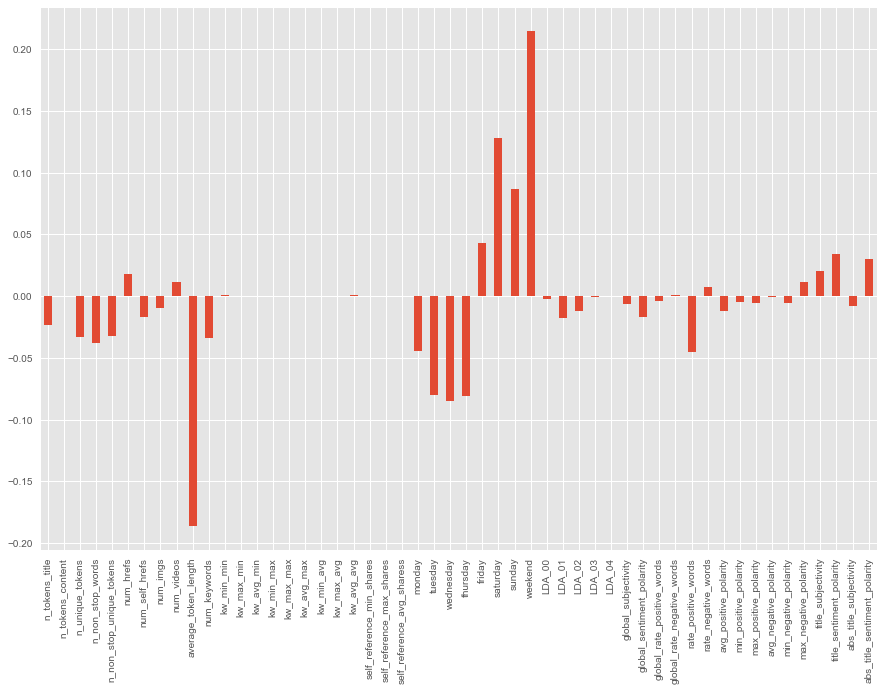

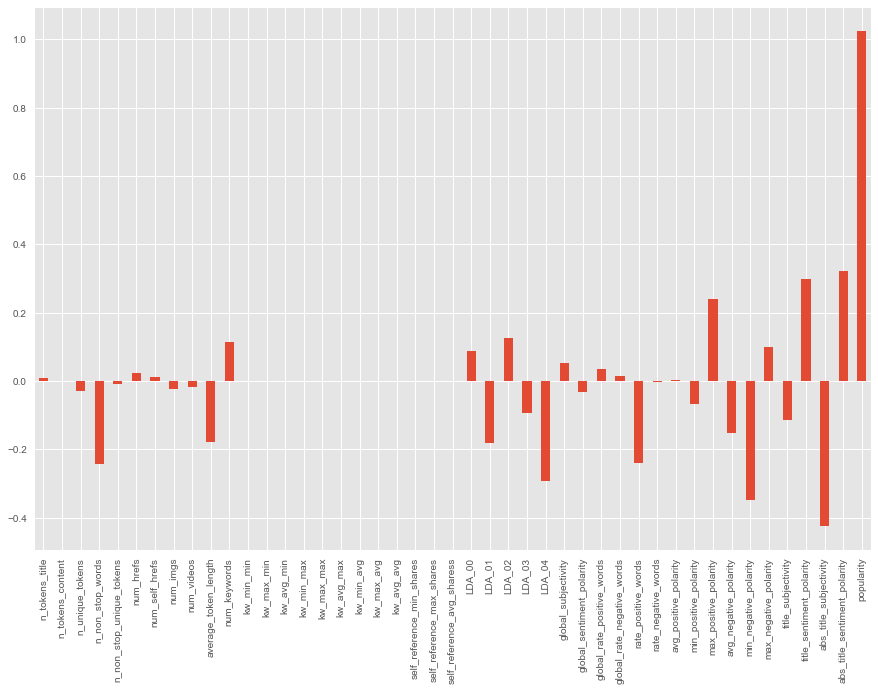

In [130]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(lr_task1, X_1, y=y_1, cv=cv_object) # this also can help with parallelism
weights = lr_task1.coef_.T # take transpose to make a column vector
variable_names = df_imputed.columns
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(15,10)
weights = pd.Series(lr_task1.coef_[0],index=df_imputed.columns)
weights.plot(kind='bar')
plt.show()

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(lr_task2, X_2, y=y_2, cv=cv_object_2) # this also can help with parallelism
weights = lr_task2.coef_.T # take transpose to make a column vector
variable_names = df_task2.columns
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(15,10)
weights = pd.Series(lr_task2.coef_[0],index=df_task2.columns)
weights.plot(kind='bar')
plt.show()

Feature importance for KNN can be determined using the kneighbors function to iterate through a random array of values between -1 and 1.  However, unlike Logistic Regression and Random Forest the weighted values or distances are relevant to the context of the entire forest and not individual attributes. In order to test feature importance you must iterate through neighboring attributes and permutate through all values to see how performance is affected for each.  The following sample code can be used to obtain distance metrics.

In [131]:
test = [[np.random.uniform(-1, 1) for _ in range(len(X_1[0]))]]

nodes, distances = knn_task1.kneighbors(test)
for d in distances:
    weight = 1.0/d
print(weight)

[ 0.33333333  0.07142857  0.03846154  0.09090909  0.03571429  0.1
  0.03333333  0.14285714  0.04166667  0.04347826  0.125       0.03225806
  0.04        1.          0.06666667  0.25        0.04761905  0.05263158
  0.11111111  0.05        0.03125   ]


Feature importance for Random Forest models can be calculated directly from the random forest model object in Python.  For classification task 1 we can see the top important features including keyword attributes, token length, content types and sentiment.  It makes sense that these would affect the popularity rating.  For classification task 2 we can again see that the top heavily weighted attributes are around article sensitivity and average_token_length.  This is similar to the Logistic Regression model and suggests that weekend publications may be longer and envoke more passionate responses from reviewers.

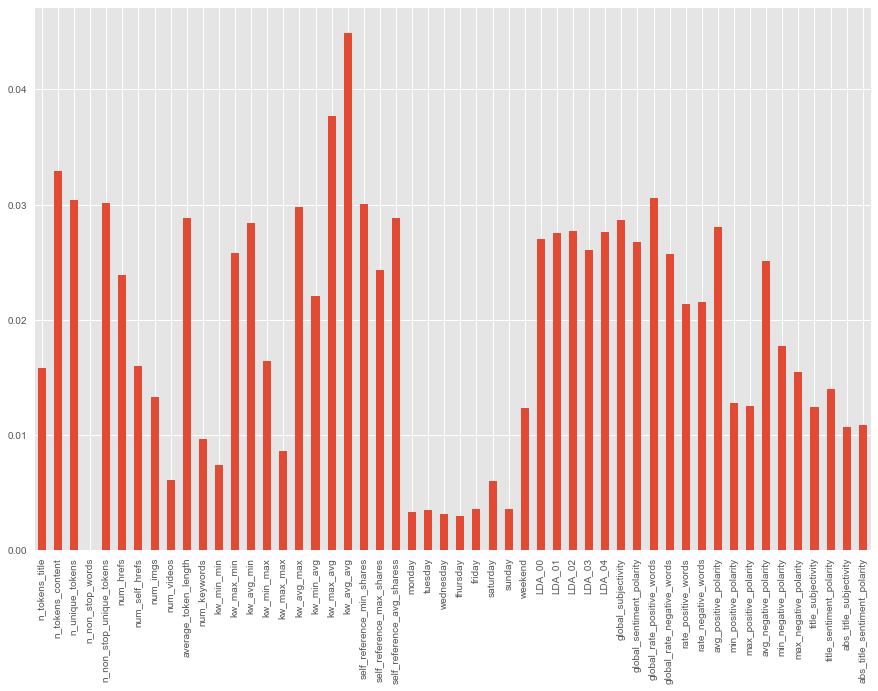

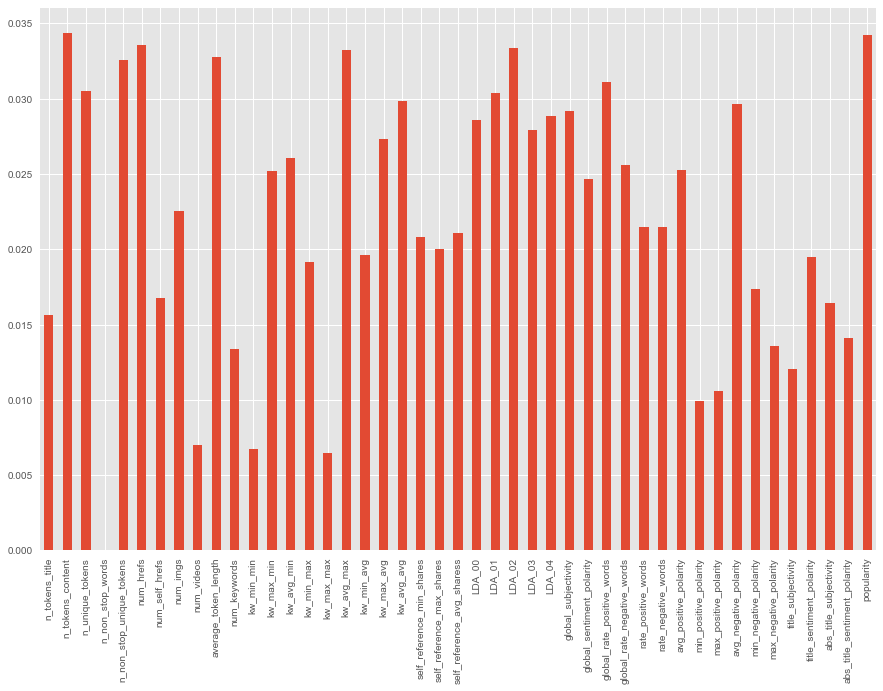

In [132]:
from sklearn.model_selection import cross_val_score
#accuracies = cross_val_score(rf_task1, X_1, y=y_1, cv=cv_object) # this also can help with parallelism
#weights = rf_task1.feature_importances_ # take transpose to make a column vector
variable_names = df_imputed.columns
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(15,10)
weights = pd.Series(rf_task1.feature_importances_,index=df_imputed.columns)
weights.plot(kind='bar')
plt.show()

from sklearn.model_selection import cross_val_score
#accuracies = cross_val_score(rf_task1, X_1, y=y_1, cv=cv_object) # this also can help with parallelism
#weights = rf_task2.feature_importances_ # take transpose to make a column vector
variable_names = df_imputed.columns
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(15,10)
weights = pd.Series(rf_task2.feature_importances_,index=df_task2.columns)
weights.plot(kind='bar')
plt.show()

## Deployment
The goal of our classification model is to create a model that can be used to predict if an article will achieve a reasonable level of popularity based on features that are known before publication. The model will be able to identify key features for an article to be popular and used as a tool to predict if an un-published article will be popular. A deployment of the model would be able to examine key features and classify a news article’s probable popularity and then suggest improvements to increase its popularity.

It is difficult to measure the value of the model for this purpose because the popularity cannot be known until after the article is published and some time has passed. An experiment could be designed to see if publishing articles with or without the use of the model results in a statistically significant difference in popularity.

One drawback of creating a model for this purpose is that the data would need to be updated on a frequent basis to tune the model to current trends. A model that predicts if an article would be popular two years ago may not be useful. The features used to create the model would probably hold constant in the short-term, but would need refreshing to remain current. 

## Exceptional Work - Multi-layer Perceptron

Multi-layer Perceptron (MLP) is a supervised learning algorithm found in sklearn that uses a neural network model. MLP can be used for classification or regression. MLP is sensitive to feature scaling. MLP trains using SGD, Adam, or L-BFGS. MLP contains a massive number of tuning parameters such as the number of hidden neurons, layers, and iterations. A useful ability of MLP for this model is that it is able to learn models in real-time (on-line learning) using ‘partial_fit’. This would be useful for the news popularity data because you could constantly feed the updating popularity numbers into the model and use the most up to date data to predict article popularity.   

In [136]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
#Default Parameters of MLP Classifier
MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [139]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_1[train])

# Now apply the transformations to the data:
X_1[train] = scaler.transform(X_1[train])
X_1[test] = scaler.transform(X_1[test])

In [140]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score


MLPClf = MLPClassifier(solver='sgd', learning_rate='invscaling', momentum=.9,
           nesterovs_momentum=True, learning_rate_init=0.2, alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)



# iterate through and get predictions for each row in yhat
for train, test in cv_object.split(X_1,y_1):   
    MLPClf.fit(X_1[train],y_1[train])
    yhat_1[test] = MLPClf.predict(X_1[test])

#evaluation metrics   
acc = mt.accuracy_score(y_1, yhat_1)
recall = mt.recall_score(y_1, yhat_1)
precision = mt.precision_score(y_1, yhat_1)
f = mt.f1_score(y_1, yhat_1)


#adding evaluation metrics to list for further analysis between models
accuracy_task2.append(acc)
recall_task2.append(recall)
precision_task2.append(precision)
fmeasure_task2.append(f)

#results in percentage
print("Accuracy of the model: {0:.4f}%".format(acc*100))
print("Recall of the model: {0:.4f}%".format(recall*100))
print("Precision of the model: {0:.4f}%".format(precision*100))
print("F-measure of the model: {0:.4f}%".format(f*100))

Accuracy of the model: 59.1614%
Recall of the model: 93.8977%
Precision of the model: 59.9531%
F-measure of the model: 73.1808%


### Further Research
Trying different combinations of parameters and each type of learner produced varying results. The overall accuracy hovered around 60%, while the recall and precision would change drastically, from 10% - 90%. Further research into the MLP classifier to understand how the parameters can be used to improve the model was attempted, but there were not many sources of information about MLP. There are interesting deep learning libraries in Python, but sklearn does not implement them. This exploration into deep learning has produced many questions that can only be answered by further research into this field.